## Implementation of K-Means Algorithm


In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import copy

In [144]:
df = pd.read_csv('IPL.csv')
df = df.rename(columns={"one": "x", "two": "y"})
print(df)

           x         y
0   0.227680  0.858204
1   0.979188  0.077151
2   0.504577  0.553114
3   0.058132  0.528098
4   0.775343  0.217922
5   0.550424  0.470860
6   0.045787  0.918579
7   0.585770  0.058032
8   0.709072  0.581874
9   0.018504  0.886523
10  0.886065  0.239564
11  0.603639  0.665584
12  0.069423  0.858128
13  0.604739  0.278110
14  0.758989  0.512027
15  0.084975  0.991122
16  0.644286  0.107302
17  0.603313  0.536479
18  0.035633  0.587474
19  0.600718  0.046561
20  0.643431  0.464620
21  0.005591  0.732528
22  0.657500  0.050252
23  0.611906  0.495266
24  0.013445  0.501685
25  0.743527  0.063866
26  0.646466  0.714837
27  0.294408  0.698652
28  0.920221  0.226376
29  0.608680  0.478632
..       ...       ...
57  0.218856  0.911291
58  0.629458  0.270982
59  0.711910  0.453416
60  0.213261  0.673522
61  0.809229  0.291985
62  0.689321  0.668715
63  0.007126  0.925599
64  0.561642  0.150842
65  0.622206  0.561722
66  0.259487  0.563452
67  0.511887  0.000516
68  0.46927

In [131]:
np.random.seed(20)
k = 3
centroids = {
    i+1: [np.random.rand(), np.random.rand()]
    for i in range(k)
}

In [132]:
def initialization():

    print("centroids: ", centroids)
    initial_map()

    return centroids

In [133]:
def initial_map():
    fig = plt.figure(figsize=(5, 5))
    plt.scatter(df['x'], df['y'], color='k')
    colmap = {1: 'r', 2: 'g', 3: 'b'}
    for i in centroids.keys():
        print("i: ", i)
        print("centroids[i]: ", centroids[i])
        plt.scatter(*centroids[i], color=colmap[i])
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.show()

In [134]:
def Euclidean_distance(x1, x2, y1, y2):

    squared_distance = 0

    squared_distance = (x1 - x2)**2 + (y1 - y2)**2

    ed = np.sqrt(squared_distance)

    return ed;

In [135]:
def plot():
    fig = plt.figure(figsize=(5, 5))
    ax = plt.axes()
    plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
    for i in centroids.keys():
        plt.scatter(*centroids[i], color=colmap[i])
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.show()

In [136]:
# 1. Assign each object to the cluster of the nearest seed point measured with a specific distance metricS

def assignment(df, centroids):
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 - (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = Euclidean_distance(df['x'], centroids[i][0], df['y'], centroids[i][1])
           
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1) #idxmin : Return index of first occurrence of minimum over requested axis
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df


In [137]:
old_centroids = copy.deepcopy(centroids)
# Compute new seed points as the centroids of the clusters of the current partition (the centroid is the centre, i.e., mean point, of the cluster)

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k


centroids:  {1: [0.5881308010772742, 0.897713727909418], 2: [0.891530729474708, 0.815837477307684], 3: [0.03588958561685329, 0.6917575817588839]}
i:  1
centroids[i]:  [0.5881308010772742, 0.897713727909418]
i:  2
centroids[i]:  [0.891530729474708, 0.815837477307684]
i:  3
centroids[i]:  [0.03588958561685329, 0.6917575817588839]


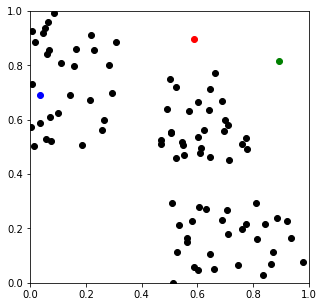

{1: [0.5881308010772742, 0.897713727909418],
 2: [0.891530729474708, 0.815837477307684],
 3: [0.03588958561685329, 0.6917575817588839]}

In [139]:
initialization()

          x         y  distance_from_1  distance_from_2  distance_from_3  \
0  0.227680  0.858204         0.362610         0.665201         0.253945   
1  0.979188  0.077151         0.908983         0.743870         1.125857   
2  0.504577  0.553114         0.354584         0.467715         0.488763   
3  0.058132  0.528098         0.646153         0.881673         0.165164   
4  0.775343  0.217922         0.705100         0.609100         0.878244   

   closest color  
0        3     b  
1        2     g  
2        1     r  
3        3     b  
4        2     g  


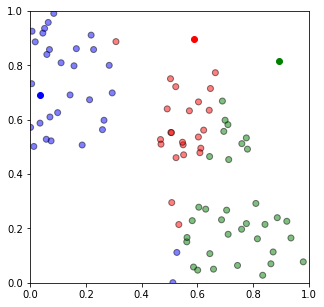

In [140]:
df = assignment(df, centroids)
print(df.head())

plot()

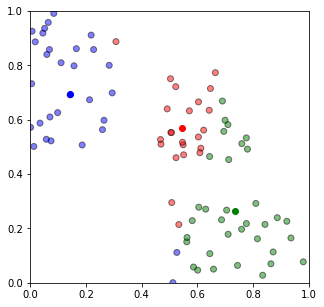

In [141]:
centroids = update(centroids)
plot()

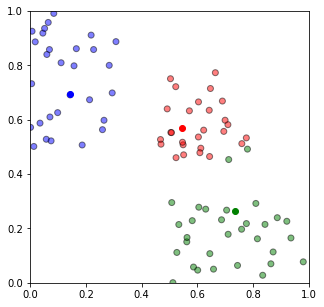

In [142]:
## Repeat Assigment Stage

df = assignment(df, centroids)

# Plot results
plot()

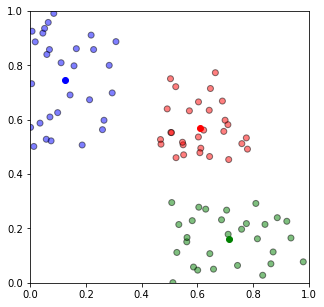

In [143]:
# Continue until all assigned categories don't change any more
while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break

plot()